In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
colnames=['area','rooms','price']
dataset=pd.read_csv('https://raw.githubusercontent.com/nishithkotak/machine-learning/refs/heads/master/ex1data2.txt',
                    names=colnames)

In [ ]:
dataset

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [ ]:
dataset.describe()

,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
area = dataset.iloc[0:dataset.shape[0], 0:1]
rooms = dataset.iloc[0:dataset.shape[0], 1:2]
price = dataset.iloc[0:dataset.shape[0], 2:3]

In [ ]:
dataset.shape

(47, 3)

In [ ]:
#function of normalization
def feature_normalization(x):
  mean=np.mean(x,axis=0)
  std=np.std(x,axis=0)
  x_norm=(x-mean)/std
  return x_norm,mean,std

In [ ]:
data_norm=dataset.values
m=data_norm.shape[0]
#take the feature vectors
x2=data_norm[:,0:2].reshape(m,2)
x2_norm,mean,std=feature_normalization(x2)

y2=data_norm[:,2:3].reshape(m,1) #price col

In [ ]:
x2_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [ ]:
theta_array=np.zeros((3,1))

In [ ]:
#linear regression
def hypothesis(theta_array,x1,x2):
  return theta_array[0]+theta_array[1]*x1+theta_array[2]*x2

In [ ]:
def cost_funtion(theta_array,x1,x2,y,m):
  sum=0
  for i in range(m):
    sum=sum+((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])*2

  return sum/(2*m)

In [ ]:
def gradiant_descent(theta_array,x1,x2,y,m,alpha):
  summation_0=0
  summation_1=0
  summation_2=0
  for i in range(m):
    summation_0=summation_0+((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])
    summation_1=summation_1+x1[i]*((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])
    summation_2=summation_2+x2[i]*((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])
  new_theta0=theta_array[0]-(alpha/m)*summation_0
  new_theta1=theta_array[1]-(alpha/m)*summation_1
  new_theta2=theta_array[2]-(alpha/m)*summation_2
  updated_new_theta=[new_theta0,new_theta1,new_theta2]
  return updated_new_theta

In [ ]:
def training(x1,x2,y,alpha,iters,theta_array,m):

  cost_values=[]

  for i in range(iters):
    theta_array=gradiant_descent(theta_array,x1,x2,y,m,alpha)
    cost_values.append(cost_funtion(theta_array,x1,x2,y,m))

  return cost_values,theta_array

In [ ]:
alpha=0.001
iters=500

In [ ]:
cost,theta=training(x2_norm[:,0:1],x2_norm[:,1:2],y2,alpha,iters,theta_array,m)

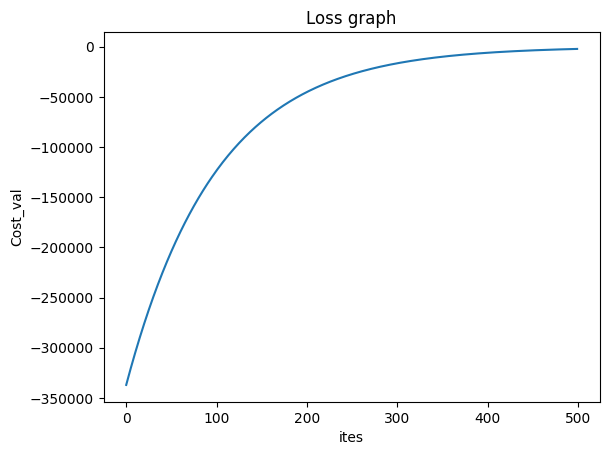

[array([338175.98396731]), array([103032.12432974]), array([-202.3252331])]


In [ ]:
alpha=0.01
itres=500
cost_val,theta_array=training(x2_norm[:,0:1],x2_norm[:,1:2],y2,alpha,itres,theta_array,m)
x_axis=np.arange(0,len(cost_val),step=1)
plt.plot(x_axis,cost_val)
plt.xlabel("ites")
plt.ylabel("Cost_val")
plt.title("Loss graph")
plt.show()
print(theta_array)